# Labelize Algorithm

## Briefing

We prepare a dateset consisting of two random sets of geometric points in the geojson format: *PointGeomFigure* and *TextPointGeomFigure*/

The goal of the algorithm is to pair the points with the text and return the text in place of the point/

## Imports

In [7]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json

from scipy.spatial import cKDTree
from shapely.geometry import Point


point_layer = """{
           "layername": "$_ROBOCZY",
           "data": {
               "type": "FeatureCollection",
               "features": [
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   18.0,
                                   20.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   47.0,
                                   48.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   90.0,
                                   78.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   80.0,
                                   42.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   }
                   ,
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   83.0,
                                   42.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   }
               ]
           }
       }"""

text_layer = """{
           "layername": "$_ROBOCZY",
           "data": {
               "type": "FeatureCollection",
               "features": [
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                    15.0,
                                    15.0,
                                    0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   45.0,
                                   18.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   95.0,
                                   82.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   20.0,
                                   80.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   80.0,
                                   40.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                   
               ]
           }
       }"""

## Data preparation

In [8]:
exact_points = gpd.read_file(point_layer, driver='GeoJSON')
text_points = gpd.read_file(text_layer, driver='GeoJSON')

In [9]:
exact_points.reset_index(inplace=True)
exact_points = exact_points.rename(columns = {'index':'point_id'})
exact_points

,point_id,geo_type,geometry
0,0,Point,POINT Z (18.00000 20.00000 0.00000)
1,1,Point,POINT Z (47.00000 48.00000 0.00000)
2,2,Point,POINT Z (90.00000 78.00000 0.00000)
3,3,Point,POINT Z (80.00000 42.00000 0.00000)
4,4,Point,POINT Z (83.00000 42.00000 0.00000)


In [10]:
text_points.reset_index(inplace=True)
text_points = text_points.rename(columns = {'index':'text_id'})
text_points

,text_id,text,geo_type,geometry
0,0,asdasdasdasd,TextPoint,POINT Z (15.00000 15.00000 0.00000)
1,1,asdasdasdasd,TextPoint,POINT Z (45.00000 18.00000 0.00000)
2,2,asdasdasdasd,TextPoint,POINT Z (95.00000 82.00000 0.00000)
3,3,asdasdasdasd,TextPoint,POINT Z (20.00000 80.00000 0.00000)
4,4,asdasdasdasd,TextPoint,POINT Z (80.00000 40.00000 0.00000)


<AxesSubplot:>

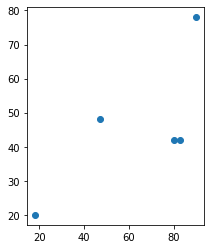

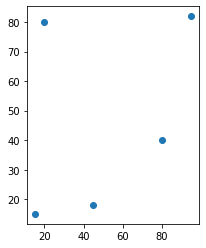

In [11]:
exact_points.plot()
text_points.plot()

In [22]:
def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    idx = btree.query_pairs(500)
#     gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
#     gdf = pd.concat(
#         [
#             gdA.reset_index(drop=True),
#             gdB_nearest
#         ], 
#         axis=1)

    return idx

In [23]:
nearest = ckdnearest(exact_points, text_points)

In [24]:
nearest

{(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)}

In [21]:
exact_points.geometry.apply(lambda g: text_points.distance(g))

C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_20524\2608735356.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  exact_points.geometry.apply(lambda g: text_points.distance(g))


,0,1,2,3,4
0,5.830952,27.073973,98.858485,60.033324,65.145990
1,45.967380,30.066593,58.821765,41.868843,33.955854
2,97.948966,75.000000,6.403124,70.028566,39.293765
3,70.384657,42.438190,42.720019,71.021124,2.000000
4,73.164199,44.944410,41.761226,73.573093,3.605551


In [62]:
for row in exact_points.itertuples():
    nearest = ckdnearest(exact_points, text_points)
    
    print(row)

Pandas(Index=0, level_0=0, index=0, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x0000017254CC7520>)
Pandas(Index=1, level_0=1, index=1, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x00000172548DDA60>)
Pandas(Index=2, level_0=2, index=2, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x0000017254CC7760>)
Pandas(Index=3, level_0=3, index=3, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x0000017254CC7A00>)
Pandas(Index=4, level_0=4, index=4, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x0000017254CC7BE0>)
